### Machine Learning 

Training our machine with machine learning Algorithm.


 - Supervised
 - Unsupervised
 - Reinforcement
    
    sometimes their is an other branch called - semi supervised
    
Supervised Learning

 As we have limitation in logistic regression that it works well for binary. However we get less accuracy for multiclass.
    
**Decision Tree** - Can be used for both Regression and Classification



Disadvantage - It casues overfitting Problem. 
             - It doesn't work well for huge dataset.
    

Hence we go for Random forest for this(Bagging technique).

### How to check if the data is balanced or not ? 

Imbalanced data - It happens when one of the classes have major number of samples in the dataset. As the data is imbalanced the model also becomes imbalance as it learns more about one of the class (and has less samples of the other class or classes to learn from)

-- to check if the dataset is balanced or not. use "value_counts()" for the target variable for classification.

##                            `Decision tree`

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. 
It is a popular and intuitive model that resembles a flowchart or tree-like structure. 


Decision trees are used to make decisions or predictions by recursively splitting the dataset into subsets based on the most 
significant attributes or features.


Here's how a decision tree works:


1. **Root Node**: At the beginning, you have a single node called the "root node" that represents the entire dataset.

    
2. **Splitting**: The decision tree algorithm evaluates different attributes (features) and selects the one that, when used as 
    a decision criterion, results in the best separation of the data into subsets. This process is repeated at each internal 
    node of the tree.

    
3. **Internal Nodes**: Internal nodes in the tree represent decisions or conditions based on the chosen attribute. For example, 
    if you were building a decision tree to classify animals, an internal node might ask, "Is it a mammal?"

    
4. **Branches**: Each branch emerging from an internal node represents one of the possible outcomes or values for that 
    attribute. For instance, if the decision is based on whether an animal is a mammal, you would have 
    two branches: "Yes" and "No."

        
5. **Leaves (Terminal Nodes)**: The terminal nodes, often referred to as "leaves," represent the final classification or 
    prediction. In the animal example, the leaves might specify the animal's species or group.

    
6. **Recursive Process**: The process of splitting the data into subsets and creating new internal nodes continues recursively 
    until certain stopping criteria are met. These criteria might include a maximum depth for the tree, a minimum number of 
    samples in a leaf node, or other factors.

    
7. **Predictions**: To make a prediction or classification for a new data point, you traverse the tree from the root node down 
    to a leaf node, following the path that corresponds to the values of the attributes for that data point. The class or 
    value associated with the leaf node is the final prediction.
    

Decision trees have several advantages, including simplicity and interpretability, as they closely resemble human 
decision-making processes. 


However, they can be prone to overfitting when they become too complex. To address this issue, techniques like pruning and 
using ensemble methods such as Random Forests are often employed. Decision trees are widely used in various fields, including 
finance, healthcare, and natural language processing, due to their versatility and ease of use.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
os.getcwd()

'C:\\Users\\SWATI\\All my files here ML\\ML projects by me'

In [7]:
os.chdir('C:\\Users\SWATI\Downloads\machine learning')

In [8]:
os.listdir()

['.ipynb_checkpoints',
 '20-08_Linear Regression Handson (1).ipynb',
 '26-08_Logistic Regression Handson (1).ipynb',
 'bank-additional-full-1 (2).csv',
 'Case_Study_Solar_Power_Efficiency_(1) (1).ipynb',
 'Correlation.png',
 'Cricket.csv',
 'customer_churn.csv',
 'dataset_explaination.txt',
 'Decision-tree_Random_forest_perfromance_measures',
 'Decision_Tree_case_study=Harsh.ipynb',
 'Decision_Tree_case_study_(5)_(1)_(1).ipynb',
 'exercise-missing-values.ipynb',
 'Graphviz (1).ipynb',
 'heart-1.csv',
 'KMeans_Clustering (3).ipynb',
 'logs.log',
 'new_insurance_data.csv',
 'Random forest Hands-on (2) (1) (1) (1).ipynb',
 'Random forest Hands-on (2) (1).ipynb',
 'train (2) (1).csv',
 'Unsupervised Learning (1).pptx']

In [9]:
data = 'heart-1.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Explanation of each column:

    
1. **age**: Age of the patient in years.

    
2. **sex**: Gender of the patient (0 for female, 1 for male).

    
3. **cp**: Chest pain type. This column likely represents different categories or levels of chest pain experienced by the 
    patient, which might be measured on an ordinal scale.

    
4. **trestbps**: Resting blood pressure (in mm Hg) measured at admission to the hospital.

    
5. **chol**: Serum cholesterol level (in mg/dl) at admission to the hospital.

    
6. **fbs**: Fasting blood sugar level. This column likely indicates whether the patient had a fasting blood sugar level higher 
    than 120 mg/dl (1 for yes, 0 for no).

    
7. **restecg**: Resting electrocardiographic results. This column may represent different categories or levels of resting ECG 
    results.

    
8. **thalach**: Maximum heart rate achieved during the exercise test.

    
9. **exang**: Exercise-induced angina (1 for yes, 0 for no). It indicates whether the patient experienced angina (chest pain 
or discomfort) during exercise.

    
10. **oldpeak**: ST depression induced by exercise relative to rest. This is a measure of how much the ST segment of the ECG 
    changes during exercise compared to rest.
    

11. **slope**: The slope of the peak exercise ST segment. This likely represents different categories or levels of the slope 
    of ST segment changes during exercise.

    
12. **ca**: The number of major vessels (0-3) colored by fluoroscopy. This is often used as a measure of the number of blood 
    vessels with significant narrowing.

    
13. **thal**: A blood disorder called thalassemia (a categorical variable with different levels).


14. **target**: The target variable or the outcome you're trying to predict. In the context of heart disease prediction, this 
    column typically indicates whether a patient has heart disease (1 for yes, 0 for no).


In [10]:
df[df['chol']>300].shape

(43, 14)

#### Checking for the data Balance

- As its binary data set we can check for values

In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:

df[df['target']==1].shape


(165, 14)

In [12]:
df.shape

(303, 14)

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age distribuition')

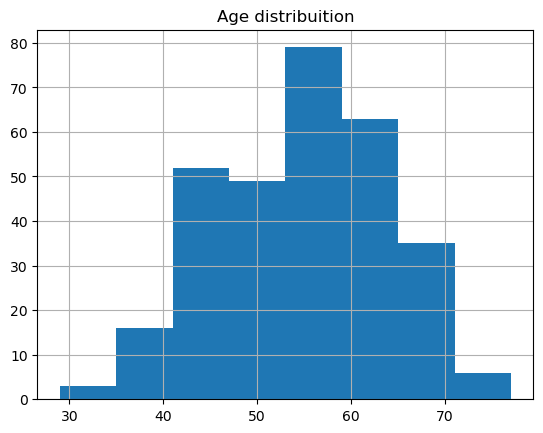

In [17]:
df['age'].hist(grid=True, bins=8);
plt.title('Age distribuition')

Text(0.5, 1.0, 'Age distribuition')

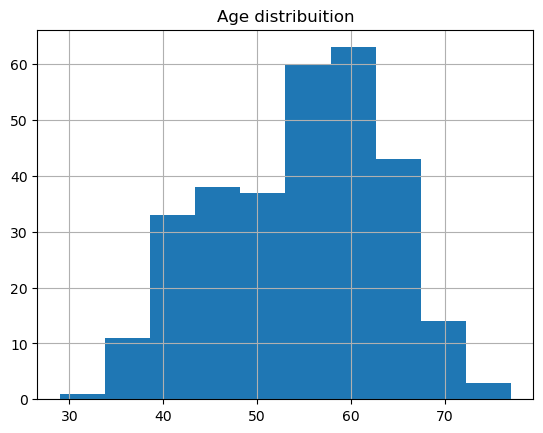

In [19]:
df['age'].hist();
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


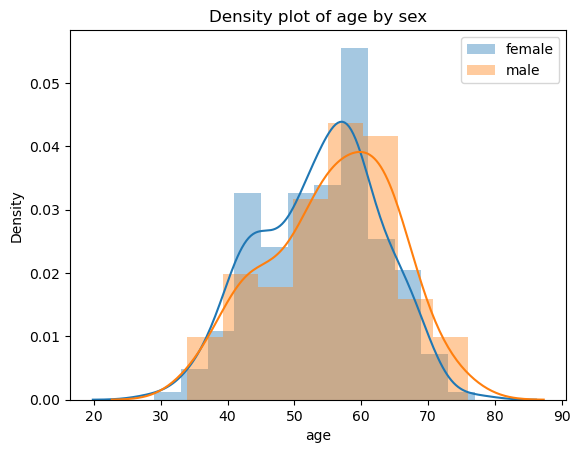

In [20]:
sns.distplot(df[df['sex']==1]['age'], label='female')
sns.distplot(df[df['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

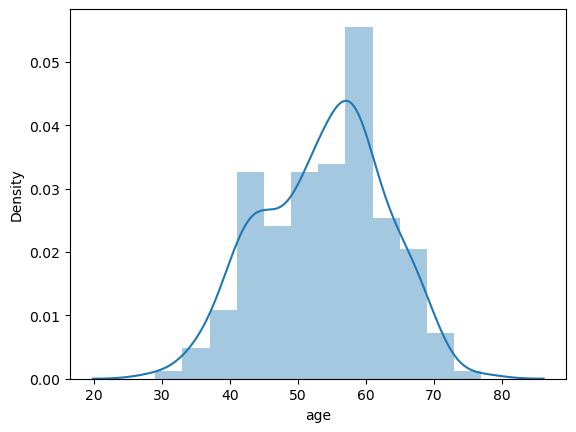

In [23]:
sns.distplot(df[df['sex']==1]['age'], label='female')

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

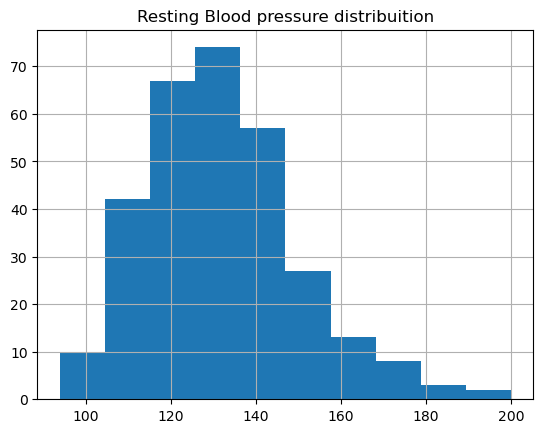

In [24]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


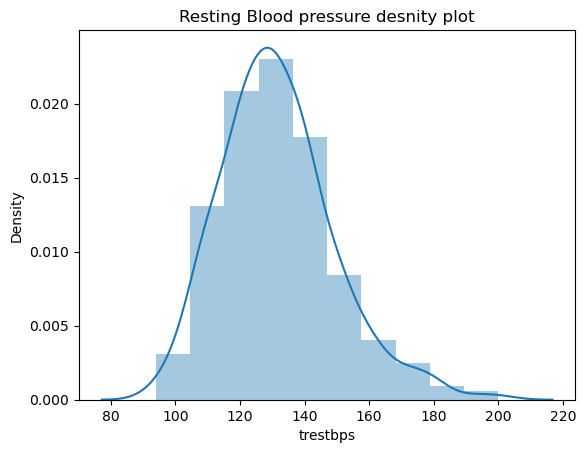

In [25]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above grapgh, we are having a normal distribution

C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='oldpeak'>

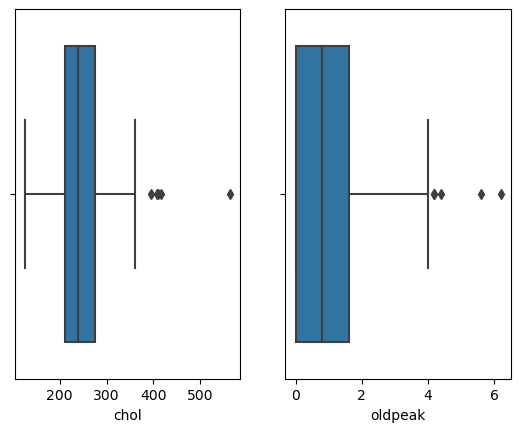

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols=2) # this 1,2 here the graphs are present in one row but 2 graphs. hence 2 cols.
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])

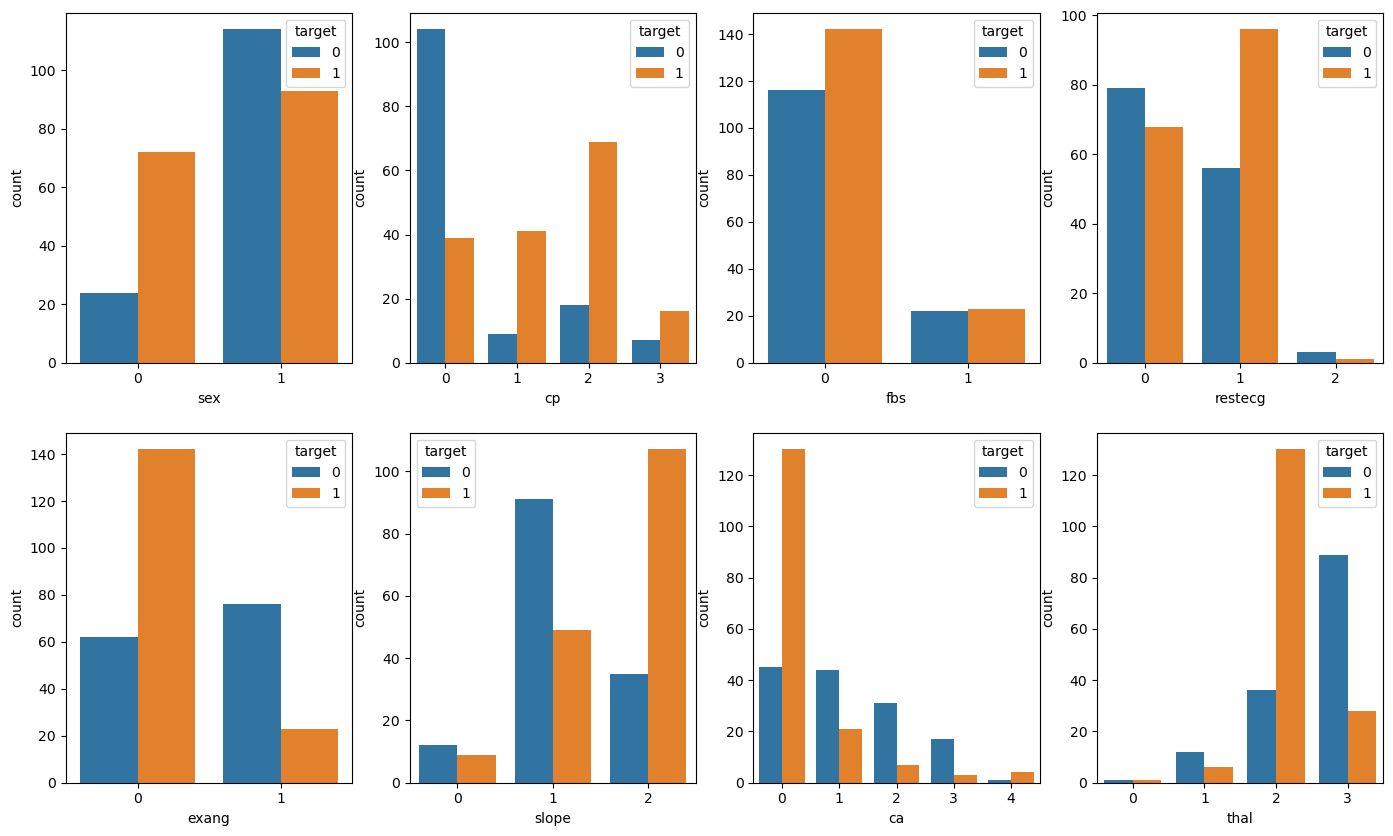

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4] # how to check for this values. What and all you can try
        sns.countplot(x=feature, hue='target', data=df,ax=ax)

### Let's get some insights frm this chart:

Chest pain: the heart disease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart disease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart disease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Count of target feature by sex')

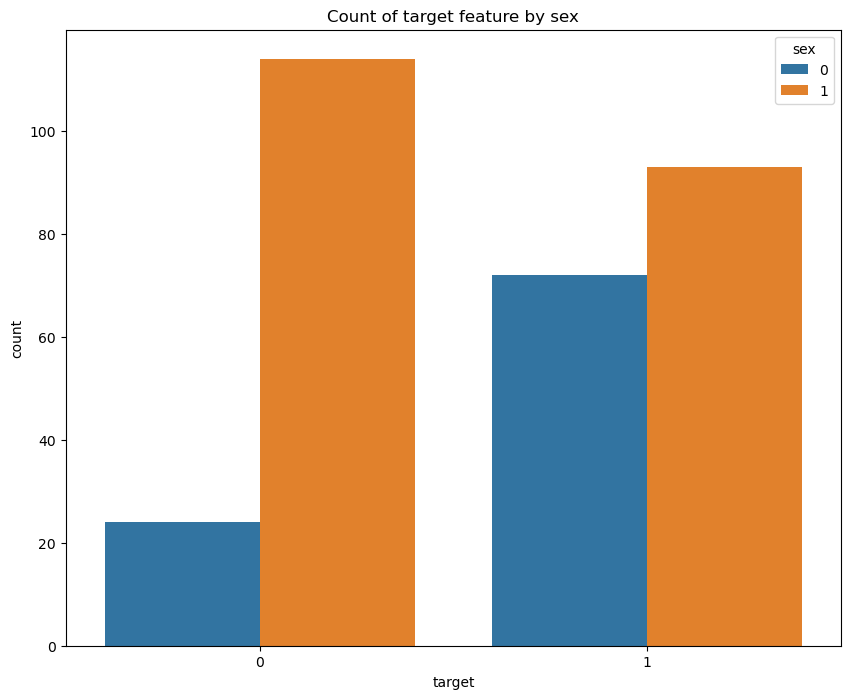

In [34]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

<AxesSubplot:>

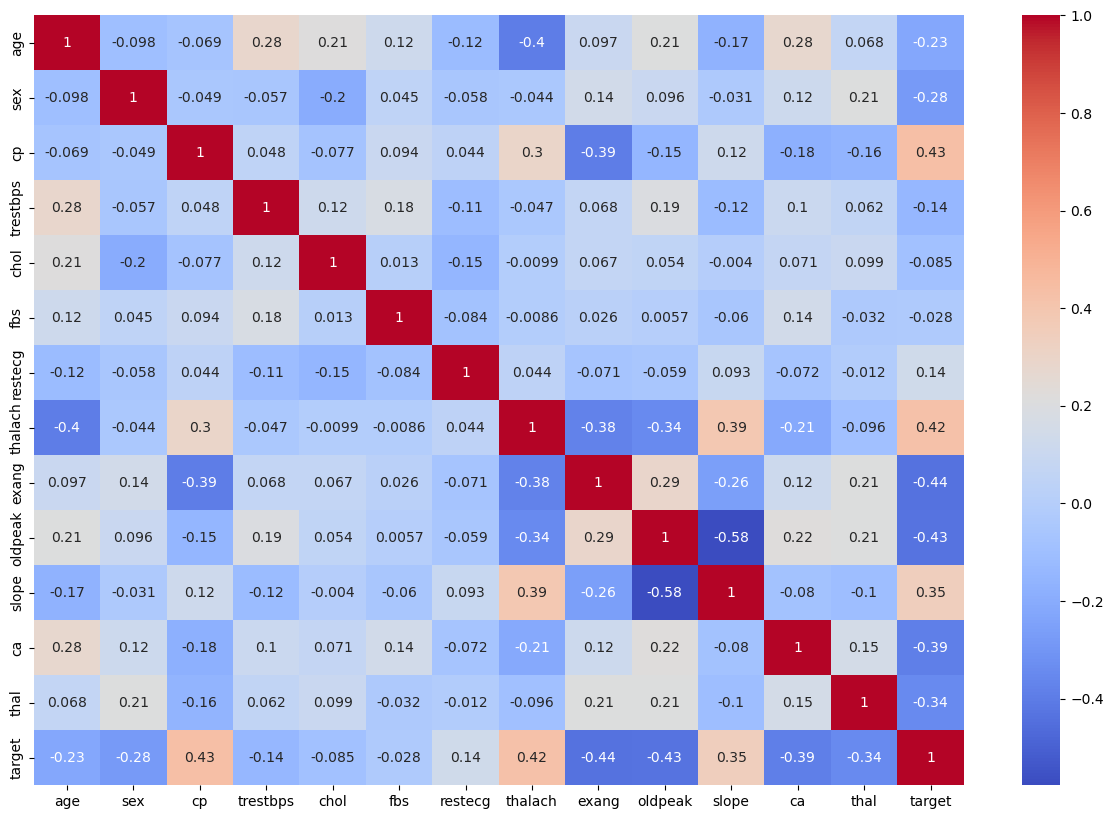

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Apparently there are no features with a pretty strong correlation (above |0.7|)

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

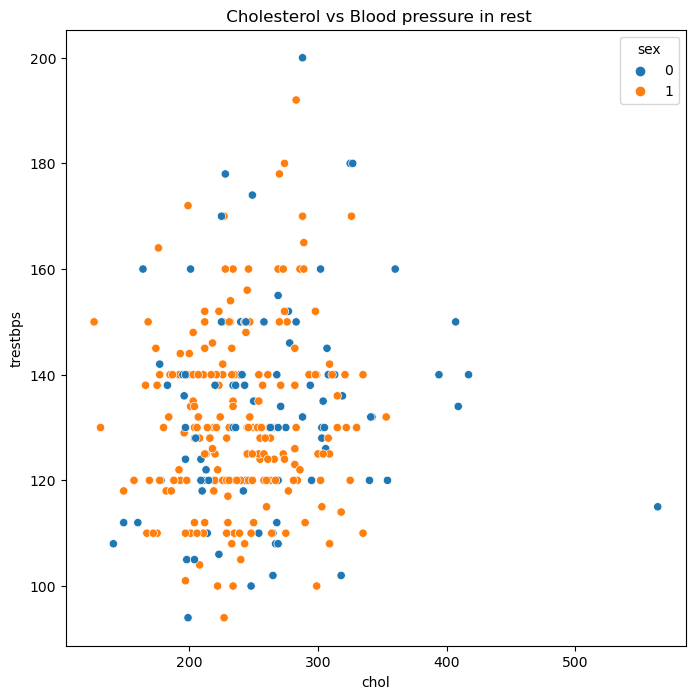

In [38]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')



As can be seen there is a paitient with high cholesterol. But, 
there's not a specific division between those that feel pain during 
exercise practice and those of not feel pain. We can use hue to 
filter by sex. It's also possible to filter using 
size = 'label_to_filer'.

In [39]:
X = df.drop(columns=['target']) #independent variable
y = df['target'] #dependnet or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [42]:
C = tree.DecisionTreeClassifier()
C.fit(x_train, y_train)
y_train_pred = C.predict(x_train)
y_test_pred = C.predict(x_test)

In [43]:
y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [44]:
y_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [45]:
#helper function

In [47]:
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

Train score 1.0
Test score 0.7142857142857143


### Confusion Martix

In [49]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

Train Confusion matrix


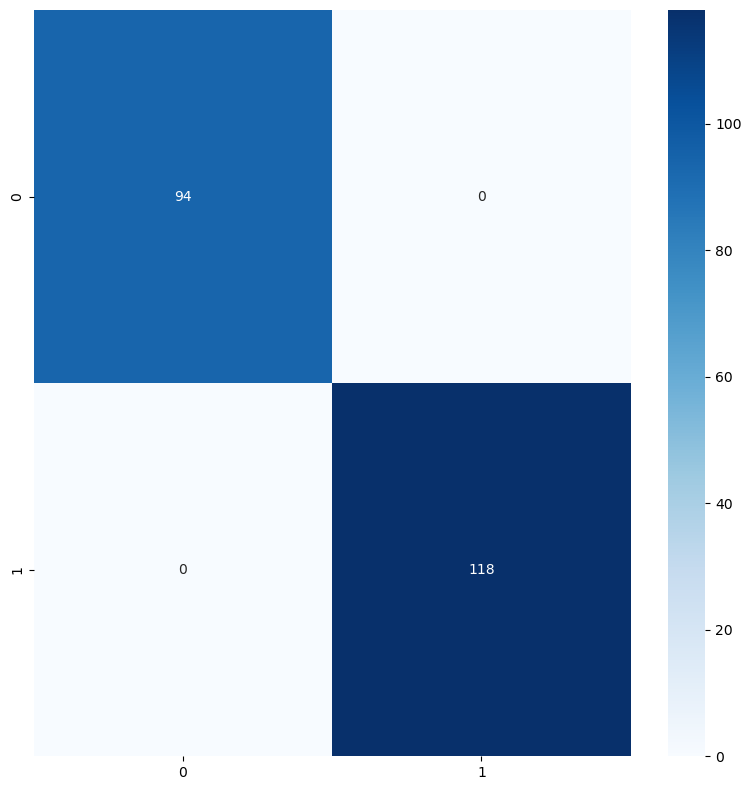

Test Confusion matrix


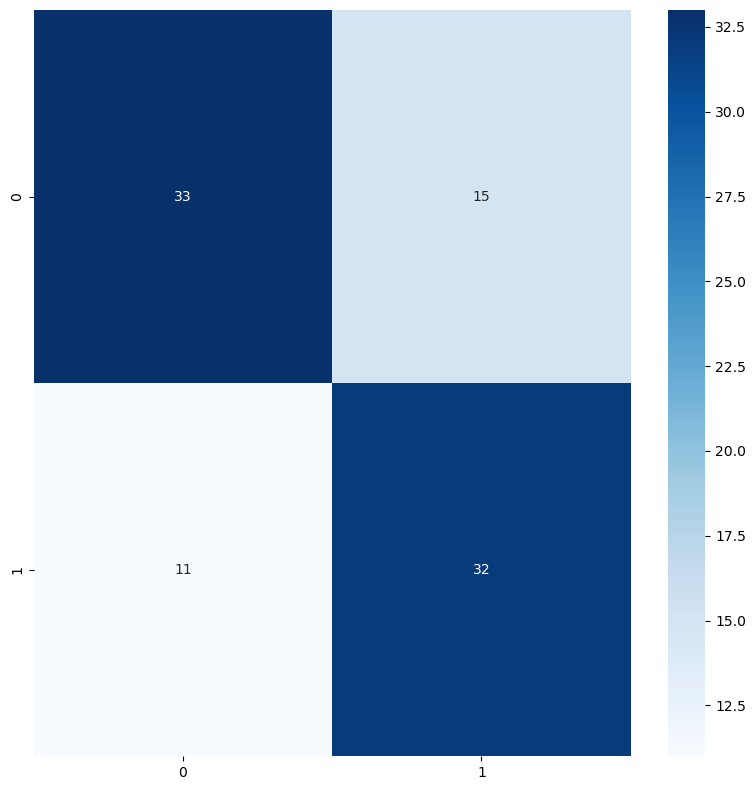

In [50]:
plot_confusionmatrix(y_train_pred, y_train, dom = 'Train')
plot_confusionmatrix(y_test_pred, y_test,dom='Test')

In [51]:
#               Actual Values
#predicted       1   0
#             1  TP  FP
#             0  FN  TN

## Hyperparameter - 1 [ Tuning ]

In [53]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(columns = [c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values :
    model = tree.DecisionTreeClassifier(max_depth = input_parameter, splitter ='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
print(df)
print("")

    max_depth   accuracy
0         1.0  76.923077
1         2.0  73.626374
2         3.0  81.318681
3         4.0  76.923077
4         5.0  74.725275
5         6.0  71.428571
6         7.0  74.725275
7         8.0  71.428571
8         9.0  72.527473
9        10.0  75.824176
10       11.0  71.428571
11       12.0  71.428571
12       13.0  74.725275
13       14.0  72.527473
14       15.0  74.725275



C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\3328914148.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\3328914148.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\3328914148.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\3328914148.py:10: FutureWarning: The frame.appe

In [54]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(columns = [c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values :
    model = tree.DecisionTreeClassifier(max_depth = input_parameter, splitter ='random')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
print(df)
print("")

    max_depth   accuracy
0         1.0  69.230769
1         2.0  73.626374
2         3.0  80.219780
3         4.0  73.626374
4         5.0  80.219780
5         6.0  73.626374
6         7.0  72.527473
7         8.0  75.824176
8         9.0  73.626374
9        10.0  76.923077
10       11.0  75.824176
11       12.0  78.021978
12       13.0  70.329670
13       14.0  78.021978
14       15.0  80.219780



C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\611359080.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\611359080.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\611359080.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score}, ignore_index = True)
C:\Users\SWATI\AppData\Local\Temp\ipykernel_36604\611359080.py:10: FutureWarning: The frame.append m

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        48
           1       0.68      0.74      0.71        43

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



In [57]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives.
#Thus, for all the customers who actually have heart disease, recall tells us how many we correctly identified as a heart 
#patient.

#precision of class 0 = TP of class 0/total number of object
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct 
#around 84% of the time.

#precision of class 1 = TP of class 1/total number of object

#macro average = (precision of class 0 + precision of class 1)/2

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1)

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives,
#Accuracy is used when the True Positives and True negatives are more important while
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(0.5493827160493827, 0.95, 'X[2] <= 0.5\ngini = 0.494\nsamples = 212\nvalue = [94, 118]'),
 Text(0.2654320987654321, 0.85, 'X[11] <= 0.5\ngini = 0.415\nsamples = 102\nvalue = [72, 30]'),
 Text(0.18518518518518517, 0.75, 'X[12] <= 2.5\ngini = 0.492\nsamples = 48\nvalue = [21, 27]'),
 Text(0.09876543209876543, 0.65, 'X[8] <= 0.5\ngini = 0.328\nsamples = 29\nvalue = [6, 23]'),
 Text(0.04938271604938271, 0.55, 'X[4] <= 316.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.024691358024691357, 0.45, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.07407407407407407, 0.45, 'X[4] <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04938271604938271, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09876543209876543, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14814814814814814, 0.55, 'X[9] <= 0.8\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.12345679012345678, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1728395061728395, 

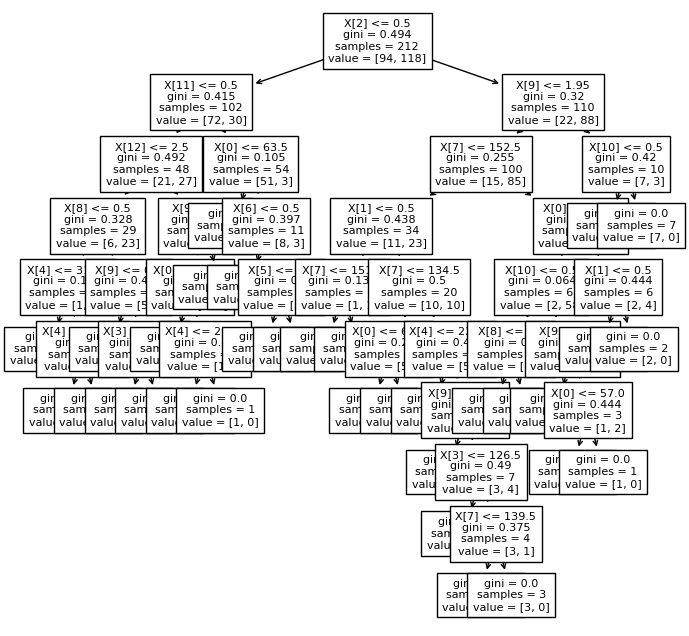

In [60]:
plot_tree(C, fontsize = 8)